In [1]:
# Importing the required modules

In [2]:
!pip install catboost

     |████████████████████████████████| 76.3 MB 1.2 MB/s 


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
import pickle
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10,6)

/usr/local/lib/python3.7/dist-packages/sklearn/experimental/enable_hist_gradient_boosting.py:17: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  "Since version 1.0, "


In [4]:
# Importing the dataset
df = pd.read_csv('Cleaned_Soil.csv')

In [5]:
# Obtaining data specific to Anantapur

In [6]:
df = df[df['District'] == 'West Godavari']
df.head()

,Unnamed: 0,Latitude,Longitude,District,Mandal,Village,SoilType,pH,EC,OC,P,K,Ca,Mg,S,Zn,B,Fe,Cu,Mn,NDVI,ARVI,EVI,GCI,NDWI,Crop
4251,4254,16.61,81.38,West Godavari,Akividu,Akividu,Black Clay,7.66,3.71,0.67,30.83,274.0,2287.0,1021.0,493.53,1.70,3.14,53.18,15.10,12.62,-0.108511,-0.050403,0.677291,-0.472292,0.309151,Paddy
4252,4255,16.61,81.37,West Godavari,Akividu,Akividu,Black Clay,7.54,2.44,0.55,20.58,252.0,2272.0,1006.0,417.53,0.82,3.79,78.44,9.98,17.40,-0.095406,0.031250,0.147864,-0.462185,0.300546,Paddy
4253,4256,16.61,81.37,West Godavari,Akividu,Akividu,Black Clay,7.37,3.55,0.82,35.71,264.0,2610.0,1028.0,543.49,1.28,3.61,87.14,16.42,29.72,-0.095406,0.031250,0.147864,-0.462185,0.300546,Paddy
4254,4257,16.61,81.37,West Godavari,Akividu,Akividu,Black Clay,7.21,1.77,0.70,35.64,206.0,2363.0,995.0,348.31,1.78,2.79,100.70,14.76,26.42,-0.095406,0.031250,0.147864,-0.462185,0.300546,Paddy
4255,4258,16.61,81.37,West Godavari,Akividu,Akividu,Black Clay,7.66,2.85,0.67,37.69,290.0,2177.0,1054.0,421.68,0.80,4.74,68.50,14.62,24.04,-0.095406,0.031250,0.147864,-0.462185,0.300546,Paddy


In [7]:
# Dropping unnecessary columns
df = df.drop(['Unnamed: 0', 'Latitude', 'Longitude', 'District', 'Mandal', 'Village', 'ARVI', 'EVI', 'NDVI', 'NDWI'], axis = 1)
df.describe()

,pH,EC,OC,P,K,Ca,Mg,S,Zn,B,Fe,Cu,Mn,GCI
count,313.000000,313.000000,313.00000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000
mean,7.047061,1.219904,0.52770,29.210224,159.092652,1400.006390,518.782748,199.571661,1.465879,2.032524,69.261086,7.465208,18.538818,2.040651
std,0.851788,1.209212,0.28375,25.089836,96.045634,822.900136,400.421594,226.740241,1.860245,1.508240,60.967097,6.403115,11.707530,1.434146
min,4.450000,0.010000,0.03000,1.180000,16.000000,86.000000,5.000000,0.810000,0.050000,0.130000,0.070000,0.070000,0.040000,-0.472292
25%,6.520000,0.110000,0.26000,11.110000,74.000000,595.000000,111.000000,6.180000,0.580000,0.560000,21.980000,1.130000,10.480000,1.147903
50%,7.240000,1.050000,0.50000,21.340000,133.000000,1410.000000,517.000000,159.000000,0.980000,1.950000,52.560000,6.320000,16.240000,1.738739
75%,7.650000,2.100000,0.76000,40.580000,233.000000,2216.000000,930.000000,342.750000,1.580000,3.210000,99.430000,14.180000,23.470000,2.987324
max,8.700000,5.860000,1.21000,152.440000,611.000000,3969.000000,1171.000000,1505.090000,18.600000,6.440000,314.900000,20.180000,86.660000,6.735354


In [8]:
# Analysis of SoilType

In [9]:
df.SoilType.unique()

array(['Black Clay', 'Black Clay ', 'Clay', 'Black', 'Light Broiwn',
       'Red Sandy', 'Red Sandy Loam', 'Brown', 'Red', 'Sandy',
       'Clay Sandy', 'Black ', 'Brown Clay', 'Brown Light', 'Brown ',
       'Light Brown', 'Sandy Loam', 'Broan Clay', 'Red  Sandy',
       'Brown Dark', 'Red Sandy '], dtype=object)

In [10]:
df['SoilType'] = df['SoilType'].replace(['Black Clay', 'Black Clay '], 'Black Clay Soil')
df['SoilType'] = df['SoilType'].replace(['Clay'], 'Clay Soil')
df['SoilType'] = df['SoilType'].replace(['Black ', 'Black'], 'Black Soil')
df['SoilType'] = df['SoilType'].replace(['Light Broiwn ', 'Brown Light', 'Light Brown', 'Light Broiwn'], 'Light Brown Soil')
df['SoilType'] = df['SoilType'].replace(['Brown', 'Brown ', 'Brown Dark'], 'Brown Soil')
df['SoilType'] = df['SoilType'].replace(['Brown Clay', 'Broan Clay'], 'Brown Clay Soil')
df['SoilType'] = df['SoilType'].replace(['Red Sandy', 'Red  Sandy', 'Red Sandy '], 'Red Sandy Soil')
df['SoilType'] = df['SoilType'].replace('Red Sandy Loam', 'Red Sandy Loam Soil')
df['SoilType'] = df['SoilType'].replace('Clay Sandy', 'Sandy Clay Soil')
df['SoilType'] = df['SoilType'].replace('Sandy', 'Sandy Soil')
df['SoilType'] = df['SoilType'].replace('Red', 'Red Soil')
df['SoilType'] = df['SoilType'].replace('Sandy Loam', 'Sandy Loam Soil')
df.SoilType.unique()

array(['Black Clay Soil', 'Clay Soil', 'Black Soil', 'Light Brown Soil',
       'Red Sandy Soil', 'Red Sandy Loam Soil', 'Brown Soil', 'Red Soil',
       'Sandy Soil', 'Sandy Clay Soil', 'Brown Clay Soil',
       'Sandy Loam Soil'], dtype=object)

In [11]:
soilCount = dict(df['SoilType'].value_counts())
soilCount

{'Black Clay Soil': 173,
 'Black Soil': 37,
 'Brown Clay Soil': 5,
 'Brown Soil': 33,
 'Clay Soil': 5,
 'Light Brown Soil': 30,
 'Red Sandy Loam Soil': 5,
 'Red Sandy Soil': 7,
 'Red Soil': 12,
 'Sandy Clay Soil': 1,
 'Sandy Loam Soil': 4,
 'Sandy Soil': 1}

<BarContainer object of 12 artists>

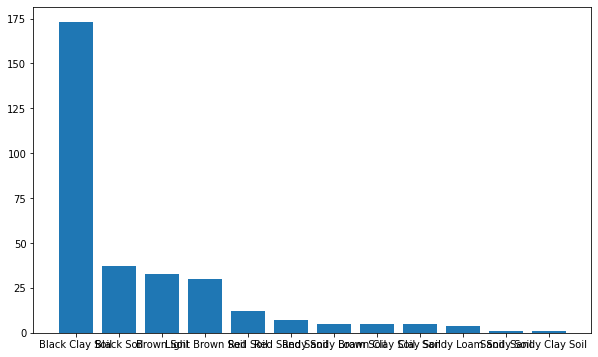

In [12]:
soilType = soilCount.keys()
soilCounts = soilCount.values()
plt.bar(soilType, soilCounts)

In [13]:
# Analysis of Crops grown 

In [14]:
df.Crop.unique()

array(['Paddy ', 'Paddy', 'Maize', 'Groundnut', 'Cashew', 'Oil Palm',
       'Coconut+ Banana', 'Coconut', 'Lime', 'Cocoa+ Coconut',
       'Sugar Cane', 'Mulberry', 'Coconut+Cocoa', 'Cocnut+Banana',
       'Oil Palm+Coconut', 'Mulberrry', 'Coconut+ Cocoa', 'Cane+Lime ',
       'Cocnut+Lime', 'Oil Palm ', 'Tobacco', 'Cane', 'Eucalyptus',
       'Mango', 'Red Sandal', 'Oil Palm+Banana', 'Sandal', 'Cashew+Maize',
       'Banana', 'Brinjal'], dtype=object)

In [15]:
df['Crop'].value_counts()

Paddy               138
Paddy                47
Maize                44
Oil Palm             37
Lime                  9
Cashew                7
Coconut               5
Cane                  3
Eucalyptus            2
Coconut+ Cocoa        1
Cocnut+Banana         1
Cane+Lime             1
Brinjal               1
Coconut+Cocoa         1
Oil Palm              1
Mulberrry             1
Sandal                1
Sugar Cane            1
Mango                 1
Oil Palm+Banana       1
Oil Palm+Coconut      1
Red Sandal            1
Banana                1
Groundnut             1
Cashew+Maize          1
Mulberry              1
Coconut+ Banana       1
Tobacco               1
Cocoa+ Coconut        1
Cocnut+Lime           1
Name: Crop, dtype: int64

Paddy                         185
OilPalm + Coconut + Banana     52
Maize                          52
SugarCane                      14
Name: Crop, dtype: int64


<BarContainer object of 4 artists>

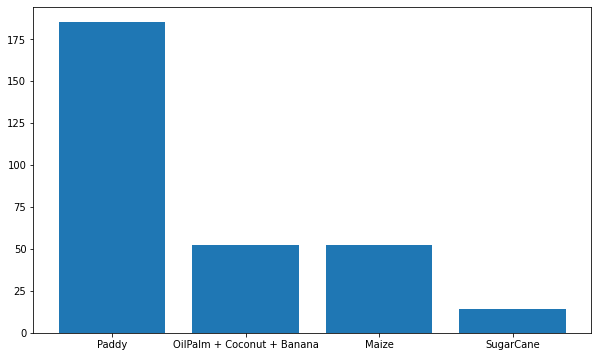

In [16]:
df['Crop'] = df['Crop'].replace(['Paddy ', 'Paddy'], 'Paddy')
df['Crop'] = df['Crop'].replace('Paady', 'Paddy')
df['Crop'] = df['Crop'].replace('Oil Palm', 'OilPalm')
df['Crop'] = df['Crop'].replace(['Coconut', 'Coconut+ Banana', 'Cocoa+ Coconut', 'Coconut+Cocoa', 'Cocnut+Banana', 'Coconut+ Cocoa', 'Cocnut+Lime'], 'Coconut')
df['Crop'] = df['Crop'].replace(['OilPalm', 'Coconut', 'Oil Palm+Coconut', 'Oil Palm ', 'Oil Palm+Banana', 'Banana'], 'OilPalm + Coconut + Banana')
df['Crop'] = df['Crop'].replace(['Cashew', 'Cashew+Maize'], 'Maize')
df['Crop'] = df['Crop'].replace(['Cane+Lime ', 'Lime', 'Cane', 'Sugar Cane'], 'SugarCane')
df = df[(df['Crop'] != 'Groundnut') & (df['Crop'] != 'Brinjal') & (df['Crop'] != 'Sandal') & (df['Crop'] != 'Red Sandal') & (df['Crop'] != 'Mango') & (df['Crop'] != 'Eucalyptus') & (df['Crop'] != 'Tobacco') & (df['Crop'] != 'Mulberrry') & (df['Crop'] != 'Mulberry')]

print(df['Crop'].value_counts())
cropCount = dict(df['Crop'].value_counts())
cropType = cropCount.keys()
cropCounts = cropCount.values()
plt.bar(cropType, cropCounts)

In [17]:
# Getting rid of features that have a high correlation among one another

In [18]:
cor_matrix = df.corr()
cor_matrix

,pH,EC,OC,P,K,Ca,Mg,S,Zn,B,Fe,Cu,Mn,GCI
pH,1.000000,0.265128,-0.007376,0.071154,0.335927,0.330180,0.311368,0.195464,-0.041114,0.325979,-0.184313,0.097448,-0.326562,-0.189492
EC,0.265128,1.000000,0.618774,0.531399,0.609634,0.658226,0.773301,0.896447,0.309252,0.843697,0.440366,0.685738,0.032399,-0.520930
OC,-0.007376,0.618774,1.000000,0.692562,0.466257,0.619471,0.649804,0.618853,0.517313,0.609047,0.805941,0.809661,0.335071,-0.512267
P,0.071154,0.531399,0.692562,1.000000,0.508427,0.381387,0.427702,0.576944,0.414544,0.499417,0.642009,0.584928,0.186620,-0.401667
K,0.335927,0.609634,0.466257,0.508427,1.000000,0.577818,0.644379,0.634508,0.180731,0.694782,0.316391,0.596825,0.067216,-0.385243
Ca,0.330180,0.658226,0.619471,0.381387,0.577818,1.000000,0.912366,0.650816,0.121050,0.731598,0.381731,0.822074,0.084419,-0.471994
Mg,0.311368,0.773301,0.649804,0.427702,0.644379,0.912366,1.000000,0.705222,0.141034,0.853073,0.423422,0.889638,0.079142,-0.530079
S,0.195464,0.896447,0.618853,0.576944,0.634508,0.650816,0.705222,1.000000,0.314794,0.795320,0.491456,0.664093,0.102953,-0.511465
Zn,-0.041114,0.309252,0.517313,0.414544,0.180731,0.121050,0.141034,0.314794,1.000000,0.228145,0.496443,0.263753,0.128532,-0.280838
B,0.325979,0.843697,0.609047,0.499417,0.694782,0.731598,0.853073,0.795320,0.228145,1.000000,0.454374,0.744184,0.045943,-0.537163


In [19]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.5)]
print('Columns to be dropped : ', to_drop)

Columns to be dropped :  ['OC', 'P', 'K', 'Ca', 'Mg', 'S', 'Zn', 'B', 'Fe', 'Cu']


In [20]:
df = df.drop(to_drop, axis = 1)
print('Columns taken into consideration : ', list(df.columns))

Columns taken into consideration :  ['SoilType', 'pH', 'EC', 'Mn', 'GCI', 'Crop']


In [21]:
# Separating the dependent and independent variables
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [22]:
# Encoding SoilType as it is a categorical variable
X = pd.get_dummies(X, prefix='', prefix_sep='')
print(X.head(1))
print(y.head(1))
X = X.values
y = y.values

        pH    EC     Mn  ...  Sandy Clay Soil  Sandy Loam Soil  Sandy Soil
4251  7.66  3.71  12.62  ...                0                0           0

[1 rows x 16 columns]
4251    Paddy
Name: Crop, dtype: object


In [23]:
# Standardizing the independent variables using Feature Scaling
sc1 = StandardScaler()
X[:, 0:4] = sc1.fit_transform(X[:, 0:4])

In [24]:
# Splitting the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0, stratify=y)

# K-Nearest Neighbors Classifier

In [25]:
clf1 = KNeighborsClassifier(weights='distance')
clf1.fit(X_train, y_train)

KNeighborsClassifier(weights='distance')

In [26]:
y_test_pred = clf1.predict(X_test)
y_train_pred = clf1.predict(X_train)
AC1_train = accuracy_score(y_train, y_train_pred)
AC1_test = accuracy_score(y_test, y_test_pred)

In [27]:
print('Training Accuracy: ', AC1_train)
print('Testing Accuracy: ', AC1_test)

Training Accuracy:  1.0
Testing Accuracy:  0.7894736842105263


In [28]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf1, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 81.07 %
Standard Deviation: 6.45 %


# Decision Tree Classifier

In [29]:
clf2 = DecisionTreeClassifier(random_state=0)
clf2.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [30]:
y_test_pred = clf2.predict(X_test)
y_train_pred = clf2.predict(X_train)
AC2_train = accuracy_score(y_train, y_train_pred)
AC2_test = accuracy_score(y_test, y_test_pred)

In [31]:
print('Training Accuracy: ', AC2_train)
print('Testing Accuracy: ', AC2_test)

Training Accuracy:  1.0
Testing Accuracy:  0.7763157894736842


In [32]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf2, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 79.74 %
Standard Deviation: 7.09 %


# Random Forest Classifier

In [33]:
clf3 = RandomForestClassifier(random_state=0)
clf3.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [34]:
y_test_pred = clf3.predict(X_test)
y_train_pred = clf3.predict(X_train)
AC3_train = accuracy_score(y_train, y_train_pred)
AC3_test = accuracy_score(y_test, y_test_pred)

In [35]:
print('Training Accuracy: ', AC3_train)
print('Testing Accuracy: ', AC3_test)

Training Accuracy:  1.0
Testing Accuracy:  0.8289473684210527


In [36]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf3, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 85.87 %
Standard Deviation: 4.80 %


In [37]:
pickle.dump(clf3, open('WG_model.pkl', 'wb'))
pickle.dump(sc1, open('WG_scaler.pkl', 'wb'))

# XGBoost

In [38]:
clf4 = HistGradientBoostingClassifier(random_state=0)
clf4.fit(X_train, y_train)

HistGradientBoostingClassifier(random_state=0)

In [39]:
y_test_pred = clf4.predict(X_test)
y_train_pred = clf4.predict(X_train)
AC4_train = accuracy_score(y_train, y_train_pred)
AC4_test = accuracy_score(y_test, y_test_pred)

In [40]:
print('Training Accuracy: ', AC4_train)
print('Testing Accuracy: ', AC4_test)

Training Accuracy:  1.0
Testing Accuracy:  0.8421052631578947


In [41]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf4, X = X_train, y = y_train, cv = 10)

In [42]:
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 84.15 %
Standard Deviation: 3.95 %


# Multi-layer Perceptron Classifier

In [43]:
clf5 = MLPClassifier(random_state=0, learning_rate= 'adaptive')
clf5.fit(X_train, y_train)

MLPClassifier(learning_rate='adaptive', random_state=0)

In [44]:
y_test_pred = clf5.predict(X_test)
y_train_pred = clf5.predict(X_train)
AC5_train = accuracy_score(y_train, y_train_pred)
AC5_test = accuracy_score(y_test, y_test_pred)

In [45]:
print('Training Accuracy: ', AC5_train)
print('Testing Accuracy: ', AC5_test)

Training Accuracy:  0.920704845814978
Testing Accuracy:  0.7894736842105263


In [46]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf5, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 85.91 %
Standard Deviation: 5.05 %


In [47]:
# pickle.dump(clf5, open('WG_model.pkl', 'wb'))
# pickle.dump(sc1, open('WG_scaler.pkl', 'wb'))

# Catboost

In [48]:
from catboost import CatBoostClassifier, Pool, cv

model = CatBoostClassifier(iterations=100, depth=2, learning_rate=1, loss_function='MultiClass', verbose=True)
model.fit(X_train, y_train)

model.calc_feature_statistics(X_train, y_train, feature=1, plot=True)

train_data = Pool(data=X_train, label=y_train)
model.get_feature_importance(train_data)

#Cross-Validation
cv_dataset = Pool(data=X_train, label=y_train)
params = {"iterations": 100, "depth": 2, "loss_function": "MultiClass", "verbose": False}
scores = cv(cv_dataset, params, fold_count=5, plot="True")

model = CatBoostClassifier(loss_function='MultiClass')
grid = {'learning_rate': [0.03, 0.1], 'depth': [4, 6, 10]}
grid_search_result = model.grid_search(grid, X=X_train, y=y_train, cv=3, plot=True)

model.score(X_test, y_test)

# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

0:	learn: 0.5275655	total: 46.8ms	remaining: 4.63s
1:	learn: 0.4358933	total: 47.2ms	remaining: 2.31s
2:	learn: 0.3980378	total: 47.6ms	remaining: 1.54s
3:	learn: 0.3803154	total: 48ms	remaining: 1.15s
4:	learn: 0.3630045	total: 48.3ms	remaining: 918ms
5:	learn: 0.3312315	total: 48.7ms	remaining: 763ms
6:	learn: 0.3260267	total: 49ms	remaining: 652ms
7:	learn: 0.3143984	total: 49.5ms	remaining: 569ms
8:	learn: 0.3061749	total: 49.8ms	remaining: 504ms
9:	learn: 0.3038556	total: 50.2ms	remaining: 452ms
10:	learn: 0.2951751	total: 50.8ms	remaining: 411ms
11:	learn: 0.2840189	total: 51.3ms	remaining: 376ms
12:	learn: 0.2801784	total: 51.9ms	remaining: 347ms
13:	learn: 0.2731010	total: 52.4ms	remaining: 322ms
14:	learn: 0.2594966	total: 53ms	remaining: 300ms
15:	learn: 0.2561720	total: 53.5ms	remaining: 281ms
16:	learn: 0.2517294	total: 54.1ms	remaining: 264ms
17:	learn: 0.2412476	total: 54.6ms	remaining: 249ms
18:	learn: 0.2378361	total: 55.2ms	remaining: 235ms
19:	learn: 0.2320058	total: 

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 0.5139601984
bestIteration = 99

Training on fold [1/5]

bestTest = 0.4599013947
bestIteration = 99

Training on fold [2/5]

bestTest = 0.5612485868
bestIteration = 98

Training on fold [3/5]

bestTest = 0.4902782075
bestIteration = 98

Training on fold [4/5]

bestTest = 0.4276492361
bestIteration = 99



MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Streaming output truncated to the last 5000 lines.
2:	learn: 1.0963400	total: 47.4ms	remaining: 15.8s
3:	learn: 1.0134665	total: 48.4ms	remaining: 12.1s
4:	learn: 0.9607805	total: 60.8ms	remaining: 12.1s
5:	learn: 0.9117393	total: 84.5ms	remaining: 14s
6:	learn: 0.8545229	total: 110ms	remaining: 15.6s
7:	learn: 0.8213077	total: 134ms	remaining: 16.6s
8:	learn: 0.7845096	total: 158ms	remaining: 17.3s
9:	learn: 0.7414274	total: 160ms	remaining: 15.8s
10:	learn: 0.7131556	total: 184ms	remaining: 16.6s
11:	learn: 0.6817401	total: 219ms	remaining: 18s
12:	learn: 0.6617002	total: 244ms	remaining: 18.5s
13:	learn: 0.6403369	total: 268ms	remaining: 18.9s
14:	learn: 0.6224615	total: 292ms	remaining: 19.2s
15:	learn: 0.6009997	total: 316ms	remaining: 19.4s
16:	learn: 0.5809004	total: 339ms	remaining: 19.6s
17:	learn: 0.5599747	total: 366ms	remaining: 20s
18:	learn: 0.5360279	total: 369ms	remaining: 19.1s
19:	learn: 0.5181551	total: 392ms	remaining: 19.2s
20:	learn: 0.4995959	total: 392ms	remaini